## AdaBoosting

In [115]:

# ライブラリ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import roc_auc_score

In [116]:
# タイタニックデータ
df = sns.load_dataset('titanic')

# 単純に欠損値のあるデータを消す
df.dropna(inplace=True)
# X, yを作成 loc[行:列]
X = df.loc[:, (df.columns!='survived') & (df.columns!= 'alive')]
y = df['survived']
# ラベルエンコーディング
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.set_output(transform='pandas')  # デフォルトだとnumpy配列で出力されるから、dfの形に変える。
X = oe.fit_transform(X)
# 学習データを分ける。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.01, random_state=0).fit(X_train, y_train)
y_pred_ada = ada.predict_proba(X_test)
print(f'adaboost AUC: {roc_auc_score(y_test, y_pred_ada[:, 1])}')

adaboost AUC: 0.9375


In [62]:
# 特徴量の重要度
ada.feature_importances_

array([0.  , 0.  , 0.02, 0.  , 0.  , 0.07, 0.  , 0.  , 0.29, 0.62, 0.  ,
       0.  , 0.  ])

<BarContainer object of 13 artists>

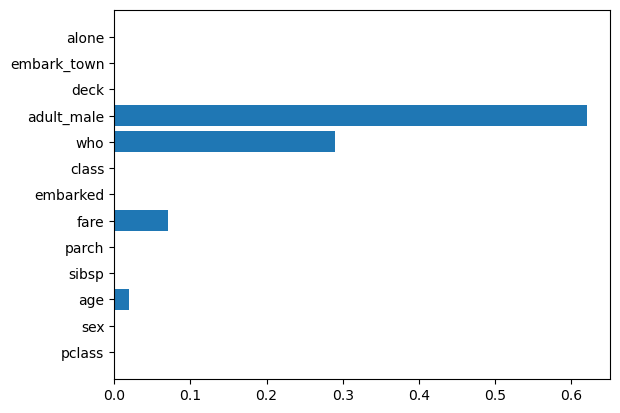

In [63]:
plt.barh(X.columns, ada.feature_importances_)

# ランダムフォレストはいろんな特徴量を選ぶ(特徴量をランダム選択されるから）でも、今回は偏りがある

### GBDT回帰

### スクラッチで実装

In [74]:
from sklearn.tree import DecisionTreeRegressor

class MyGridentBoostingRegressor:

    def __init__(self, learning_rate=0.03, n_estimators=100, max_depth=1, random_state=0):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.estimators = []

    def fit(self, X, y):

        self.F0 = y.mean()
        Fb = self.F0

        for _ in range(self.n_estimators):
            # 残差を計算する
            r = y - Fb
            estimator = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            estimator.fit(X, r)
            weight = estimator.predict(X)
            Fb += self.learning_rate * weight
            self.estimators.append(estimator)
            
    def predict(self, X):

        Fb = self.F0

        for estimator in self.estimators:
            Fb += self.learning_rate * estimator.predict(X)

        return Fb

In [79]:
# my_gbr = MyGridentBoostingRegressor(learning_rate=0.4, n_estimators = 40, max_depth=2, random_state=2)
my_gbr = MyGridentBoostingRegressor()
my_gbr.fit(X, y)
my_gbr.predict(X)

array([17.95434839, 15.74535562, 15.74535562, 15.74535562, 16.96376992,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 15.74535562,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 23.01512881,
       23.01512881, 22.21547999, 24.54754893, 24.54754893, 31.96655862,
       24.54754893, 24.54754893, 23.01512881, 20.76151767, 24.54754893,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 24.54754893,
       24.54754893, 23.01512881, 20.76151767, 20.76151767, 20.76151767,
       24.54754893, 20.76151767, 15.74535562, 15.74535562, 15.74535562,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 20.76151767,
       27.71424635, 20.76151767, 24.54754893, 24.54754893, 24.54754893,
       31.61939691, 27.71424635, 31.96655862, 31.61939691, 31.96655862,
       31.61939691, 23.01512881, 27.71424635, 31.96655862, 24.54754893,
       24.54754893, 15.74535562, 15.74535562, 15.74535562, 15.74535562,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 15.74

In [80]:
len(mgbr.estimators)

0

In [81]:
import seaborn as sns
df = sns.load_dataset('mpg')
df.dropna(inplace=True)


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [83]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='horsepower', ylabel='mpg'>

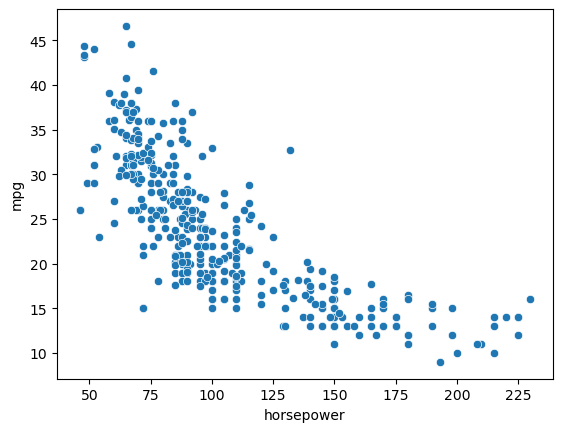

In [84]:
# データ準備
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values
sns.scatterplot(x=df['horsepower'], y=df['mpg'])

### sklearnで勾配ブースティングを使う

In [88]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate=0.03, max_depth=1, random_state=0).fit(X, y)


In [89]:
gbr.predict(X)[:5]

array([17.95434839, 15.74535562, 15.74535562, 15.74535562, 16.96376992])

In [91]:
my_gbr.predict(X) == gbr.predict(X)

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True, False,  True, False, False,
       False, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False, False,  True,  True,  True,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True, False,  True,  True, False, False,
       False, False,

In [94]:
# モデルを確認できる
gbr.estimators_[:5]

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                              random_state=RandomState(MT19937) at 0xFFFF57083140)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                              random_state=RandomState(MT19937) at 0xFFFF57083140)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                              random_state=RandomState(MT19937) at 0xFFFF57083140)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                              random_state=RandomState(MT19937) at 0xFFFF57083140)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                              random_state=RandomState(MT19937) at 0xFFFF57083140)]],
      dtype=object)

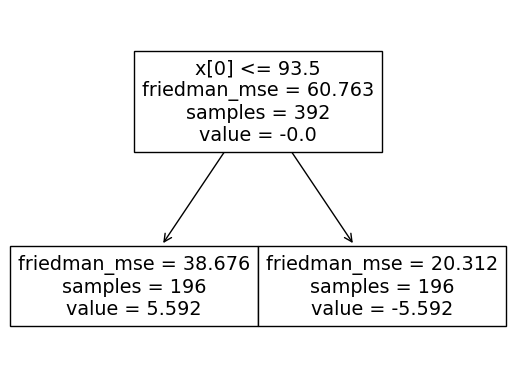

In [101]:
# 1個目のモデルを描画する
from sklearn.tree import plot_tree
model = gbr.estimators_[0][0]
_ = plot_tree(model)

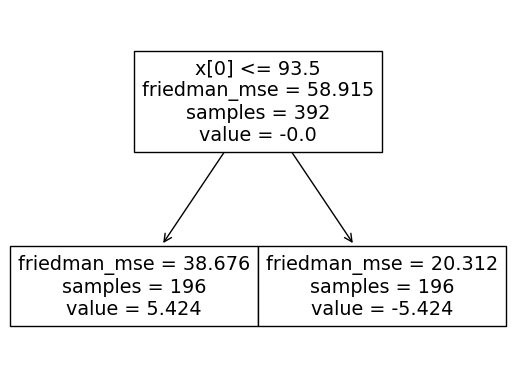

In [103]:
# 2個目の決定技
from sklearn.tree import plot_tree
model = gbr.estimators_[1][0]
_ = plot_tree(model)

### 勾配ブースティング分類を実装

### スクラッチで実装

In [108]:
model = DecisionTreeRegressor(max_depth=1, random_state=0).fit(X,y)

In [109]:
# それぞれの値がどの葉に落ちるのかを取得する, 葉のID
model.apply(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,

In [111]:
model.tree_.value

array([[[23.44591837]],

       [[29.0377551 ]],

       [[17.85408163]]])

[Text(0.5, 0.75, 'x[0] <= 93.5\nsquared_error = 60.763\nsamples = 392\nvalue = 23.446'),
 Text(0.25, 0.25, 'squared_error = 38.676\nsamples = 196\nvalue = 29.038'),
 Text(0.75, 0.25, 'squared_error = 20.312\nsamples = 196\nvalue = 17.854')]

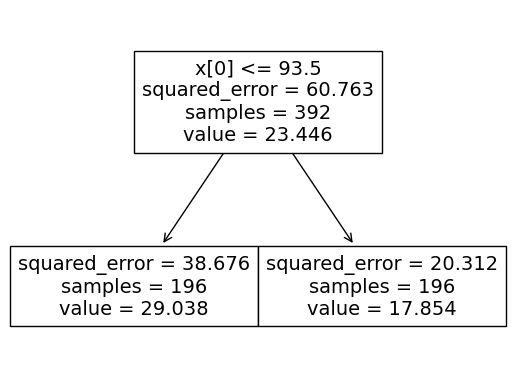

In [112]:
plot_tree(model)

In [113]:
model.predict(X)

array([17.85408163, 17.85408163, 17.85408163, 17.85408163, 17.85408163,
       17.85408163, 17.85408163, 17.85408163, 17.85408163, 17.85408163,
       17.85408163, 17.85408163, 17.85408163, 17.85408163, 17.85408163,
       17.85408163, 17.85408163, 29.0377551 , 29.0377551 , 29.0377551 ,
       29.0377551 , 29.0377551 , 17.85408163, 17.85408163, 29.0377551 ,
       17.85408163, 17.85408163, 17.85408163, 17.85408163, 29.0377551 ,
       29.0377551 , 17.85408163, 17.85408163, 17.85408163, 17.85408163,
       29.0377551 , 17.85408163, 17.85408163, 17.85408163, 17.85408163,
       17.85408163, 17.85408163, 17.85408163, 17.85408163, 17.85408163,
       29.0377551 , 17.85408163, 29.0377551 , 29.0377551 , 29.0377551 ,
       29.0377551 , 29.0377551 , 29.0377551 , 29.0377551 , 29.0377551 ,
       29.0377551 , 17.85408163, 29.0377551 , 29.0377551 , 29.0377551 ,
       29.0377551 , 17.85408163, 17.85408163, 17.85408163, 17.85408163,
       17.85408163, 17.85408163, 17.85408163, 17.85408163, 17.85

In [174]:
class MyGradientBoostingClassifier:

    def __init__(self, learning_rate=0.03, n_estimators=100, max_depth=1, random_state=0):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.estimators = []

    def fit(self, X, y):
        F0 = np.log(y.mean()/1 - y.mean())
        F0 = np.full(len(y), F0)
        Fb = F0

        for _ in range(self.n_estimators):
            p = 1 / (1 + np.exp(-Fb))
            r = y - p
            estimator = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            estimator.fit(X, r)
            X_leafs = estimator.apply(X)
            leaf_ids = np.unique(X_leafs)
            for leaf_id in leaf_ids:
                # 弱学習機の出力の値を計算
                fltr = X_leafs == leaf_id
                num = r[fltr].sum()
                den = (p[fltr]*(1- p[fltr])).sum()
                estimator_pred_proba = num / den
                # 弱学習機の出力を上書き
                estimator.tree_.value[leaf_id, 0, 0] = estimator_pred_proba
                # 当該データのFbを更新
                Fb[fltr] += self.learning_rate * estimator_pred_proba


            self.estimators.append(estimator)
            
            

In [208]:
# タイタニックデータ
df = sns.load_dataset('titanic')

# 単純に欠損値のあるデータを消す
df.dropna(inplace=True)
# X, yを作成 loc[行:列]
X = df.loc[:, (df.columns!='survived') & (df.columns!= 'alive')]
y = df['survived']
# ラベルエンコーディング
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.set_output(transform='pandas')  # デフォルトだとnumpy配列で出力されるから、dfの形に変える。
X = oe.fit_transform(X)
# 学習データを分ける。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [209]:
my_gbc = MyGradientBoostingClassifier()
my_gbc.fit(X_train, y_train)

/tmp/ipykernel_410/1131609559.py:11: RuntimeWarning: divide by zero encountered in log
  F0 = np.log(y.mean()/1 - y.mean())
/tmp/ipykernel_410/1131609559.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  estimator_pred_proba = num / den
/tmp/ipykernel_410/1131609559.py:31: RuntimeWarning: invalid value encountered in add
  Fb[fltr] += self.learning_rate * estimator_pred_proba


ValueError: Input y contains NaN.

In [ ]:
# 3というスカラーがあったら下のコードで、ベクトルかをする。

np.full(10, 3)

### 勾配ブースティングをsklearnを使ってやる

In [210]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.03, max_depth=1, random_state=0).fit(X_train, y_train)
gbc.predict_proba(X_test)[:, 1]
print(f"grad boost AUC : {roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])} ")

grad boost AUC : 0.9407051282051282 


In [215]:
resuls = []
for t in gbc.estimators_:
    result = 0.03 * t[0].predict([X_test.iloc[0]])
    results.append(result)

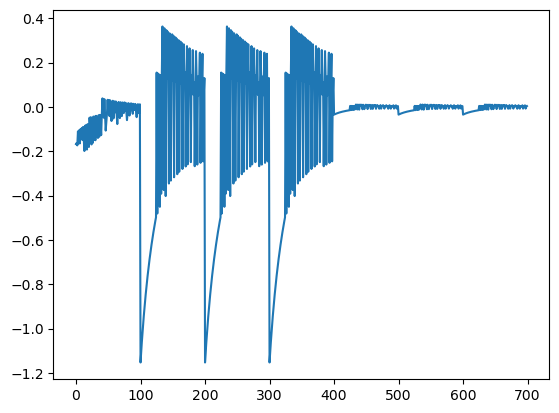

In [216]:
plt.plot(results)

In [221]:
F0 = np.log(y_train.mean()/(1 - y_train.mean()))
Fb = F0 + np.cumsum(results)[-1]
predict = 1 / (1 + np.exp(-Fb))

In [222]:
Fb

-52.52635752609639

In [223]:
array = [1, 2, 3]
np.cumsum(array)

array([1, 3, 6])

In [224]:
predict

1.5420298189068682e-23